# Methodology

In [1]:
from nilearn import datasets, plotting, regions
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io as sio
from nilearn.image import index_img
import mvlearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/Users/VictoriaShevchenko/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


OSError: Could not load shared object file: libllvmlite.dylib

In [3]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Participants

The dataset provided by the REST-meta-MDD Consortium {cite:p}`yan_reduced_2019` contained preprocessed region-wise resting state fMRI time-series of 1,300 patients diagnosed with MDD and 1,128 healthy controls.

In [7]:
current_dir = os.getcwd()
fmri_ind_path = os.path.join(current_dir,"", "ROISignals_FunImgARCWF", "", "ROISignals_%s.mat")
phenotype_path = os.path.join(current_dir,"", "REST-meta-MDD-PhenotypicData_WithHAMDSubItem_V4.xlsx")

Among the depressed group, 447 patients were drug-naïve. The exclusion of one patient from the analyses due to missing signals resulted in 446 drug-naïve individuals in total (278 females, mean age = 32.7 years, SD = 12 years).

In [10]:
#Importing drug naïve subjects with MDD
data_DN_MDD = [] # N = 446 

subj_excel_DN_MDD = pd.read_excel(phenotype_path, sheet_name = 'Drug Naïve MDD', converters = {'ID':str})
subj_excel_DN_MDD['Group'] = 'Drug-Naïve MDDs'
df_subj_DN_MDD = pd.DataFrame(subj_excel_DN_MDD, columns= ['ID', 'Sex', 'Age', 'Education (years)', 'Group'])
df_subj_DN_MDD = df_subj_DN_MDD.drop([45])

subj_ID_DN_MDD = df_subj_DN_MDD['ID'].to_numpy()
subj_ID_DN_MDD_array = np.squeeze(subj_ID_DN_MDD, axis = None)

for subject in subj_ID_DN_MDD_array:
    DN_MDD_matlab_file = sio.loadmat(fmri_ind_path % subject)
    DN_MDD_timeseries = np.asarray(DN_MDD_matlab_file["ROISignals"][:, 116:212])
    data_DN_MDD.append(DN_MDD_timeseries.T)
    
# Overview of demographic variables
df_subj_DN_MDD.describe()
df_subj_DN_MDD["Sex"].value_counts()

Sex         Age  Education (years)
count  446.000000  446.000000         446.000000
mean     1.623318   32.697309          11.791480
std      0.485098   11.967009           4.062879
min      1.000000   12.000000           0.000000
25%      1.000000   24.000000           9.000000
50%      2.000000   30.000000          12.000000
75%      2.000000   40.750000          15.000000
max      2.000000   75.000000          21.000000

2    278
1    168
Name: Sex, dtype: int64

 We sampled the same number of controls (252 females, mean age = 36.3 years, SD = 11.8 years).

In [11]:
#Importing controls
data_NC = [] # N = 446 

subj_excel_NC = pd.read_excel(phenotype_path, sheet_name = 'Controls', converters = {'ID':str})
subj_excel_NC['Group'] = 'Controls'
df_subj_NC = pd.DataFrame(subj_excel_NC, columns= ['ID', 'Sex', 'Age', 'Education (years)', 'Group'])
df_subj_NC = df_subj_NC.drop([91,92, 220, 221, 222, 223, 270, 271, 272, 273, 274, 275, 276])
df_subj_NC = df_subj_NC[df_subj_NC['Age'] != 0] # removing subjects with age == 0

subj_ID_NC = df_subj_NC['ID'].to_numpy()
subj_ID_NC_array = np.squeeze(subj_ID_NC, axis = None)

for subject in subj_ID_NC_array[0:446]:
    NC_matlab_file = sio.loadmat(fmri_ind_path % subject)
    NC_timeseries = np.asarray(NC_matlab_file["ROISignals"][:, 116:212])
    data_NC.append(NC_timeseries.T) 
    
df_subj_NC = df_subj_NC[0:446]
 
data_NC_small = data_NC[0:382] # N = 382 for the comparison with the subjects on meds
df_subj_NC_small = df_subj_NC[0:382]

# Overview of demographic variables
df_subj_NC.describe()
df_subj_NC["Sex"].value_counts()

df_subj_NC_small.describe()
df_subj_NC_small["Sex"].value_counts()

Sex         Age  Education (years)
count  446.000000  446.000000         446.000000
mean     1.565022   31.959641          12.336323
std      0.496311   11.302110           5.628489
min      1.000000   14.000000           0.000000
25%      1.000000   24.000000          11.000000
50%      2.000000   29.000000          15.000000
75%      2.000000   37.750000          16.000000
max      2.000000   66.000000          23.000000

2    252
1    194
Name: Sex, dtype: int64

Sex         Age  Education (years)
count  382.000000  382.000000         382.000000
mean     1.565445   32.078534          12.007853
std      0.496349   11.811472           5.927598
min      1.000000   14.000000           0.000000
25%      1.000000   23.000000          10.000000
50%      2.000000   29.000000          15.000000
75%      2.000000   39.000000          16.000000
max      2.000000   66.000000          23.000000

2    216
1    166
Name: Sex, dtype: int64

As for the subjects on medication (MED), complete data were available for only 382 of them (257 females, mean age = 43.7 years, SD = 16.4 years).

In [12]:
#Importing subjects on medication
data_MED_MDD = [] # N = 382

subj_excel_MED_MDD = pd.read_excel(phenotype_path, sheet_name = 'On Medication', converters = {'ID':str})
subj_excel_MED_MDD['Group'] = 'MDDs on Medication'
df_subj_MED_MDD = pd.DataFrame(subj_excel_MED_MDD, columns= ['ID', 'Sex', 'Age', 'Education (years)', 'Group'])
df_subj_MED_MDD = df_subj_MED_MDD.drop([117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143])

subj_ID_MED_MDD = df_subj_MED_MDD['ID'].to_numpy()
subj_ID_MED_MDD_array = np.squeeze(subj_ID_MED_MDD, axis = None)

for subject in subj_ID_MED_MDD_array:
    MED_MDD_matlab_file = sio.loadmat(fmri_ind_path % subject)
    MED_MDD_timeseries = np.asarray(MED_MDD_matlab_file["ROISignals"][:, 116:212])
    data_MED_MDD.append(MED_MDD_timeseries.T)
    
# Overview of demographic variables
df_subj_MED_MDD.describe()
df_subj_MED_MDD["Sex"].value_counts()

Sex         Age  Education (years)
count  382.000000  382.000000         382.000000
mean     1.672775   43.717277          10.967277
std      0.469816   16.442333           3.686480
min      1.000000   12.000000           0.000000
25%      1.000000   30.000000           8.000000
50%      2.000000   42.000000          11.000000
75%      2.000000   58.000000          15.000000
max      2.000000   82.000000          19.000000

2    257
1    125
Name: Sex, dtype: int64

The data were fully anonymized and contributed from studies approved by local Institutional Review Boards in China. The participants also provided written consent at their local institution. The number of subjects in the drug-naïve group provided sufficient power (~ 99%) to detect a small effect (Cohen’s d = 0.2; {cite:t}`cohen_statistical_1988`). In contrast, the number of patients on medication would only permit to detect an effect of 0.3.

The descriptive statistics of the sample can be viewed in figures below.

In [13]:
df_desc_stat = pd.concat([df_subj_DN_MDD, df_subj_MED_MDD, df_subj_NC[:446]], ignore_index=True)

In [14]:
# Regular expressions to extract site
import re

site = re.compile(r'(?<=S)[0-9]+')
df_desc_stat['Site'] = [np.asarray(site.findall(i[1])) for i in df_desc_stat['ID'].items()]
df_desc_stat['Site'] = [str(i[1].squeeze()) for i in df_desc_stat['Site'].items()]
site_order = sorted(df_desc_stat['Site'].unique(), key = lambda x: int(x))
df_desc_stat['Site'] = pd.Categorical(df_desc_stat['Site'], site_order)

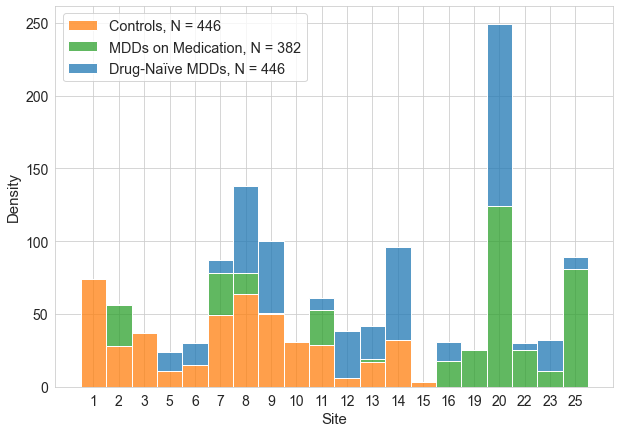

In [15]:
#Group ~ Site
import seaborn as sns
sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.histplot(data = df_desc_stat,
             x = 'Site', ax=ax, hue = "Group", palette=["tab:blue", 'tab:green', "tab:orange"], multiple="stack", legend = False)          
new_labels = ['Controls, N = 446' , 'MDDs on Medication, N = 382', 'Drug-Naïve MDDs, N = 446']
plt.legend(new_labels, loc = 'upper left', fontsize = 'x-large')

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Site', fontsize = 15)
plt.ylabel('Density', fontsize = 15);

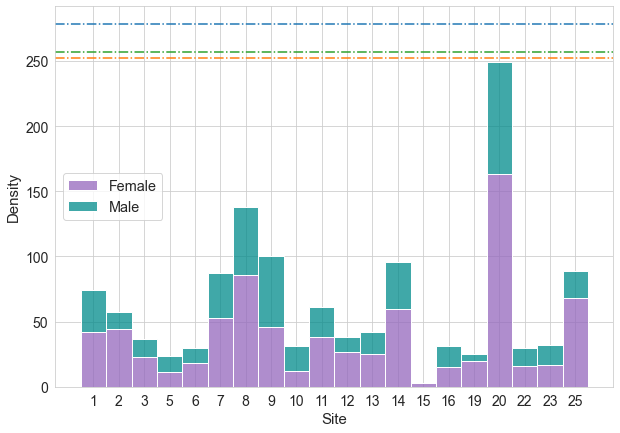

In [16]:
#Sex ~Site
females_DN = np.asarray(df_desc_stat['Sex'][(df_desc_stat['Sex'] == 2) & (df_desc_stat['Group'] == 'Drug-Naïve MDDs')].value_counts())[0]
females_MED = np.asarray(df_desc_stat['Sex'][(df_desc_stat['Sex'] == 2) & (df_desc_stat['Group'] == 'MDDs on Medication')].value_counts())[0]
females_NC = np.asarray(df_desc_stat['Sex'][(df_desc_stat['Sex'] == 2) & (df_desc_stat['Group'] == 'Controls')].value_counts())[0]

sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
g = sns.histplot(data = df_desc_stat,
             x = 'Site', ax=ax, hue = "Sex", palette=["darkcyan", 'tab:purple'], multiple="stack", legend = False)          
new_labels = ['Female', 'Male']
plt.legend(labels=new_labels, loc = 'center left', fontsize = 'x-large')

ax.axhline(females_DN, c = 'tab:blue', linestyle = '-.')
ax.axhline(females_MED, c = 'tab:green', linestyle = '-.')
ax.axhline(females_NC, c = 'tab:orange', linestyle = '-.')

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Site', fontsize = 15)
plt.ylabel('Density', fontsize = 15);


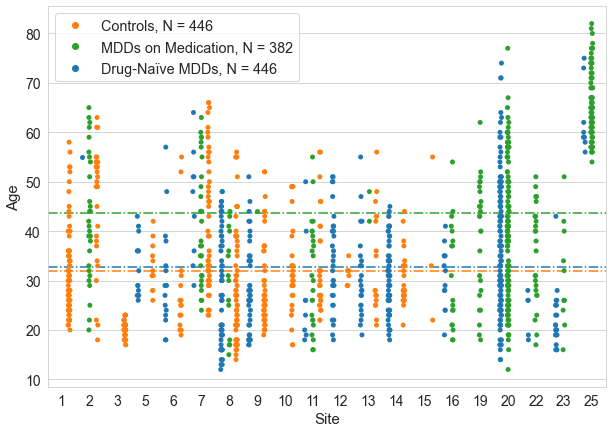

In [17]:
#Age ~Site
import matplotlib.patches as mpatches

age_mean_DN = df_desc_stat.loc[(df_desc_stat['Group'] == 'Drug-Naïve MDDs')]['Age'].mean()
age_mean_MED = df_desc_stat.loc[(df_desc_stat['Group'] == 'MDDs on Medication')]['Age'].mean()
age_mean_NC = df_desc_stat.loc[(df_desc_stat['Group'] == 'Controls')]['Age'].mean()

sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.stripplot(data = df_desc_stat,
             x = 'Site', y = 'Age', ax=ax, hue = "Group", palette=["tab:blue", 'tab:green', "tab:orange"], dodge = True)

ax.axhline(y = age_mean_DN, c = 'tab:blue', linestyle = '-.')
ax.axhline(y = age_mean_MED, c = 'tab:green', linestyle = '-.')
ax.axhline(y = age_mean_NC, c = 'tab:orange', linestyle = '-.')

colors=["tab:orange", 'tab:green', "tab:blue"]
handles = []
for x in colors:
    handles.append(plt.Line2D([], [], color=x, marker="o", linewidth=0))
    
handles = [(plt.Line2D([], [], color=x, marker="o", linewidth=0)) for x in colors]
new_labels = ['Controls, N = 446' , 'MDDs on Medication, N = 382', 'Drug-Naïve MDDs, N = 446']

ax.legend(handles, new_labels, fontsize = 'x-large')

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Site', fontsize = 15)
plt.ylabel('Age', fontsize = 15);

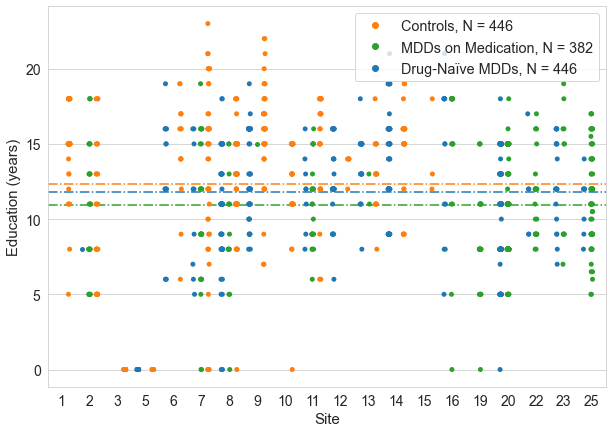

In [18]:
#Education ~Site

education_mean_DN = df_desc_stat.loc[(df_desc_stat['Group'] == 'Drug-Naïve MDDs')]['Education (years)'].mean()
education_mean_MED = df_desc_stat.loc[(df_desc_stat['Group'] == 'MDDs on Medication')]['Education (years)'].mean()
education_mean_NC = df_desc_stat.loc[(df_desc_stat['Group'] == 'Controls')]['Education (years)'].mean()

sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.stripplot(data = df_desc_stat,
             x = 'Site', y = 'Education (years)', ax=ax, hue = "Group", palette=["tab:blue", 'tab:green', "tab:orange"], dodge = True)          
colors=["tab:orange", 'tab:green', "tab:blue"]
handles = []
for x in colors:
    handles.append(plt.Line2D([], [], color=x, marker="o", linewidth=0))
    
handles = [(plt.Line2D([], [], color=x, marker="o", linewidth=0)) for x in colors]
new_labels = ['Controls, N = 446' , 'MDDs on Medication, N = 382', 'Drug-Naïve MDDs, N = 446']

ax.legend(handles, new_labels, loc = 'best', fontsize = 'x-large')

ax.axhline(y = education_mean_DN, c = 'tab:blue', linestyle = '-.')
ax.axhline(y = education_mean_MED, c = 'tab:green', linestyle = '-.')
ax.axhline(y = education_mean_NC, c = 'tab:orange', linestyle = '-.')

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Site', fontsize = 15)
plt.ylabel('Education (years)', fontsize = 15);

## Cortical Parcellation

The fMRI time-series were readily preprocessed and contained a number of parcellations. The subsequent analyses are based on the Harvard-Oxford probabilistic cortical atlas containing 96 regions: cort-maxprob-thr25-2mm. The preprocessing procedure of the resting state fMRI data is outlined in {cite:t}`yan_reduced_2019`.

<style>
.marginauto {
    margin: 10px auto 20px;
    display: block;
}
</style>


<img class="marginauto" src="figures/HO_ATLAS.png" width = 450 alt="centered image" />

<img class="marginauto" src="figures/HO_LEGEND.png" width = 600 alt="centered image" />





The results are reported and interpreted based on the visually assessed spatial overlap between the regions defined by the Harvard-Oxford atlas and Yeo's seven networks ({cite:t}`thomas_yeo_organization_2011`: figure below). We deemed Yeo’s atlas useful for two reasons. Firstly, it allows to infer the cognitive function of Harvard-Oxford regions based on the spatial overlap with the networks. Secondly, since Yeo’s parcellation is widely used in functional connectivity analyses, we regarded it necessary to contextualize the results of the present study in terms of Yeo’s networks to render them comparable to those emanating from previous research.

<img class = "marginauto" src="figures/YEO_ATLAS.png" width="750" class = "center">
<img class = "marginauto" src="figures/YEO_LEGEND.png" width="150" class = "center">

In [36]:
nilearn_HO_atlas = datasets.fetch_atlas_harvard_oxford(atlas_name = "cort-maxprob-thr25-2mm", symmetric_split = True)
atlas_ind_path = os.path.join(current_dir,"", 'HarvardOxford_Atlas_NewIndex_YCG.xlsx')
HO_excel = pd.read_excel(atlas_ind_path)
HO_indices_pd = pd.DataFrame(HO_excel, columns= ['New Index'])
HO_indices_np = HO_indices_pd.to_numpy()
nilearn_HO_atlas_L = datasets.fetch_atlas_harvard_oxford(atlas_name = "cort-maxprob-thr25-2mm", symmetric_split = True)
HO_cortical_indices = np.squeeze(HO_indices_np, axis = None)
HO_cortical_indices = HO_cortical_indices[0:96]
labels = nilearn_HO_atlas['labels'][1:97]


## Statistical Methods

### Cortical Gradient Extraction: GCCA

Quantitatively, gradients are components explaining maximum variance in functional connectivity. Gradients can be extracted by means of a dimensionality reduction algorithm such as principal component analysis (PCA). Up until now, a non-linear algorithm called diffusion map embedding has been the most commonly used in the extraction of macroscale gradients ({cite:p}`coifman_geometric_2005`; implemented in {cite:p}`margulies_situating_2016,hong_atypical_2019,dong_compressed_2021, girn_serotonergic_2020`). This technique requires multiple preliminary steps such as the computation of a similarity matrix from the timeseries and the alignment of the gradients to a common group-level template. In practical terms, diffusion map embedding necessitates a lengthy preprocessing procedure. To avoid it, we leaned towards another dimensionality reduction algorithm: generalized canonical correlation analysis (GCCA).

A linear dimensionality reduction algorithm, GCCA is based on PCA. We favored this analysis for a number of additional reasons. Firstly, in the comparative study of {cite:t}`hong_atypical_2019`, PCA scored higher on reproducibility and discriminability metrics than diffusion map embedding and Laplacian eigenmaps. Furthermore, {cite:t}`afshin-pour_enhancing_2012` showed that GCCA is suitable for data such as resting state fMRI, which are characterized by large intra- and inter-subject variability.
 
GCCA is an extension of canonical correlation analysis (CCA) which solves the problem of identifying basis vectors of two datasets such that the products **[dataset (1) * basis vector (1)]** and **[dataset (2) * basis vector (2)]** are maximally correlated. On a conceptual level, CCA can be viewed as PCA with the exception that it extracts only those components, which explain the variance common to both datasets. {cite:p}`sorensen_generalized_2021` Essentially, GCCA is the version of CCA applicable to more than two datasets.


In [21]:
#All data
ALL_DATA = data_DN_MDD + data_MED_MDD + data_NC

In [22]:
#Fitting on the data of all subjects

from mvlearn.embed import GCCA

gcca = GCCA(n_components = 2) # or specify another thresholding eg, n_components=5 or fraction_var=0.8

gcca.fit(ALL_DATA)

projs = gcca.transform(ALL_DATA)


GCCA(n_components=2)

In [23]:
# Dividing GCCA-transformed data into groups
projs_DN_MDD = projs[:446]
projs_MED_MDD = projs[446:828]
projs_NC = projs[828:]
projs_NC_small = projs[828:1210]

Macroscale cortical gradients resulting from GCCA.

In [24]:
# Gradient Data Frame
grad_distributions_DN_NC = np.empty((96 * 446, 4))

grad_distributions_DN_NC[:, 0] = np.reshape(projs_DN_MDD[:,:, 0], 96 * 446)
grad_distributions_DN_NC[:, 1] = np.reshape(projs_NC[:,:, 0], 96 * 446)
grad_distributions_DN_NC[:, 2] = np.reshape(projs_DN_MDD[:,:, 1], 96 * 446)
grad_distributions_DN_NC[:, 3] = np.reshape(projs_NC[:,:, 1], 96 * 446)

grad_distributions_DN_NC = pd.DataFrame(grad_distributions_DN_NC, columns = ['Drug-Naïve MDDs, 1st Gradient', 
                                                                             'Controls, 1st Gradient', 
                                                                             'Drug-Naïve MDDs, 2nd Gradient',
                                                                            'Controls, 2nd Gradient'])
# Gradient Data Frame: (Subject, [Group, gradient], gradient value)
grad_distributions_DN_NC_wide = grad_distributions_DN_NC.melt(var_name = 'Group')

Distribution of scores: first gradient (DN vs NC).

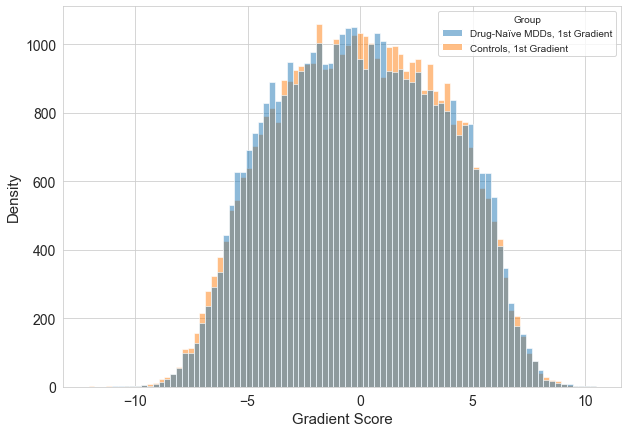

In [25]:
distribution_DN_NC_1 = grad_distributions_DN_NC_wide.loc[(grad_distributions_DN_NC_wide['Group'] == 'Drug-Naïve MDDs, 1st Gradient') | (grad_distributions_DN_NC_wide['Group'] == 'Controls, 1st Gradient')]
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data = distribution_DN_NC_1,
             x = 'value', ax=ax, hue = "Group", palette=["tab:blue","tab:orange"])

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Gradient Score', fontsize = 15)
plt.ylabel('Density', fontsize = 15);

Distribution of scores: second gradient (DN vs NC).

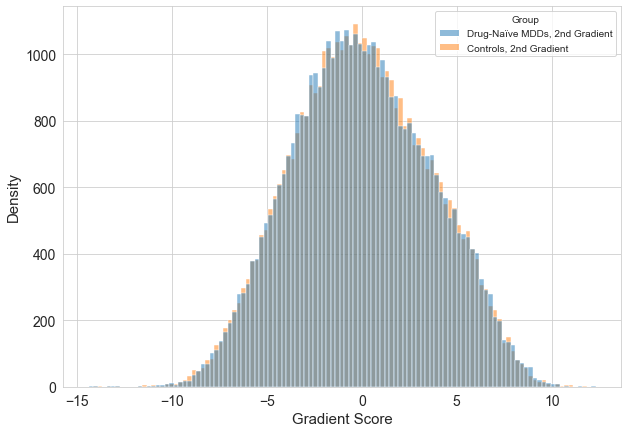

In [26]:
distribution_DN_NC_2 = grad_distributions_DN_NC_wide.loc[(grad_distributions_DN_NC_wide['Group'] == 'Drug-Naïve MDDs, 2nd Gradient') | (grad_distributions_DN_NC_wide['Group'] == 'Controls, 2nd Gradient')]
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data = distribution_DN_NC_2,
             x = 'value', ax=ax, hue = "Group", palette=["tab:blue","tab:orange"])

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Gradient Score', fontsize = 15)
plt.ylabel('Density', fontsize = 15);

In [27]:
# Gradient Data Frame
grad_distributions_MED = np.empty((96 * 382, 2))
grad_distributions_NC = np.empty((96 * 382, 2))

grad_distributions_MED[:, 0] = np.reshape(projs_MED_MDD[:,:, 0], 96 * 382)
grad_distributions_MED[:, 1] = np.reshape(projs_MED_MDD[:,:, 1], 96 * 382)

grad_distributions_NC[:, 0] = np.reshape(projs_NC_small[:,:, 0], 96 * 382)
grad_distributions_NC[:, 1] = np.reshape(projs_NC_small[:,:, 1], 96 * 382)

grad_distributions_MED = pd.DataFrame(grad_distributions_MED, columns = ['MDDs on Medication, 1st Gradient', 
                                                                             'MDDs on Medication, 2nd Gradient'])

grad_distributions_NC = pd.DataFrame(grad_distributions_NC, columns = ['Controls, 1st Gradient', 
                                                                             'Controls, 2nd Gradient'])
# Gradient Data Frame: (Subject, [Group, gradient], gradient value)
grad_distributions_MED_wide = grad_distributions_MED.melt(var_name = 'Group')
grad_distributions_NC_wide = grad_distributions_NC.melt(var_name = 'Group')

grad_distributions_MED_NC_wide = pd.concat([grad_distributions_MED_wide, grad_distributions_NC_wide])

Distribution of scores: first gradient (MED vs NC).

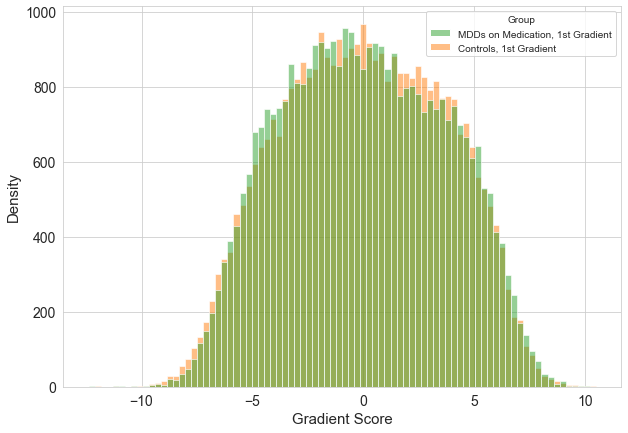

In [28]:
distribution_MED_NC_1 = grad_distributions_MED_NC_wide.loc[(grad_distributions_MED_NC_wide['Group'] == 'MDDs on Medication, 1st Gradient') | (grad_distributions_MED_NC_wide['Group'] == 'Controls, 1st Gradient')]
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data = distribution_MED_NC_1,
             x = 'value', hue = "Group", palette=["tab:green","tab:orange"])
ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Gradient Score', fontsize = 15)
plt.ylabel('Density', fontsize = 15);

Distribution of scores: second gradient (MED vs NC).

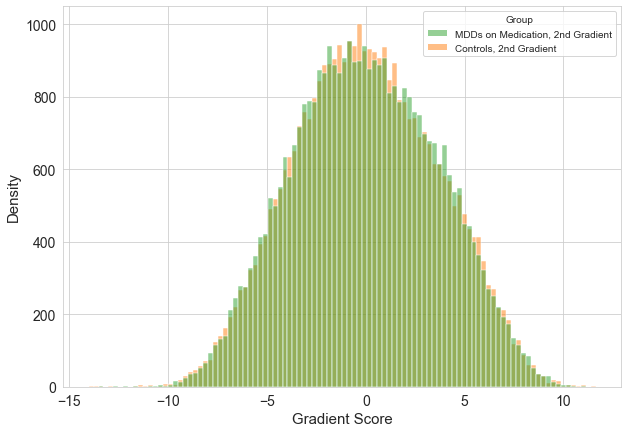

In [29]:
distribution_MED_NC_2 = grad_distributions_MED_NC_wide.loc[(grad_distributions_MED_NC_wide['Group'] == 'MDDs on Medication, 2nd Gradient') | (grad_distributions_MED_NC_wide['Group'] == 'Controls, 2nd Gradient')]
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data = distribution_MED_NC_2,
             x = 'value', ax=ax, hue = "Group", palette=["tab:green","tab:orange"])

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Gradient Score', fontsize = 15)
plt.ylabel('Density', fontsize = 15);

### Visualization with fsaverage

In [34]:
from nilearn.image import index_img
from nilearn.surface import vol_to_surf
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
fsaverage = datasets.fetch_surf_fsaverage()

def get_surf_texture(data, atlas):
    signal = np.expand_dims(data, axis = 0)
    region_labels = regions.signals_to_img_labels(signals = signal,
                                                labels_img = atlas)
    vis = index_img(region_labels, 0)
    texture_l = vol_to_surf(vis, fsaverage['pial_left'])
    texture_r = vol_to_surf(vis, fsaverage['pial_right'])
    return texture_l, texture_r

def plot_stat_surf(statistic, surf_type, cmap, colorbar_1 = False, colorbar_2 = False, colorbar_3 = False, colorbar_4 = False, darkness = 0.5):
    figure, axes = plt.subplots(1, 4, subplot_kw=dict(projection='3d'), figsize = (20, 7), dpi=300) 
    texture_l, texture_r = get_surf_texture(statistic, nilearn_HO_atlas['maps'])
    plotting.plot_surf_stat_map(fsaverage['{}_left'.format(surf_type)], texture_l, hemi='left', view = 'lateral', threshold = 0.00000001,
                            title='LH, Lateral', cmap = cmap, colorbar=colorbar_1, darkness = darkness, bg_on_data=True, figure = figure, axes = axes[0],
                            bg_map=fsaverage.sulc_left)
    plotting.plot_surf_stat_map(fsaverage['{}_left'.format(surf_type)], texture_l, hemi='left', view = 'medial', threshold = 0.00000001,
                            title='LH, Medial', cmap = cmap, colorbar=colorbar_2, darkness = darkness, bg_on_data=True, figure = figure, axes = axes[1],
                            bg_map=fsaverage.sulc_left)
    plotting.plot_surf_stat_map(fsaverage['{}_right'.format(surf_type)], texture_r, hemi='right', view = 'medial', threshold = 0.00000001,
                            title='RH, Medial', cmap = cmap,  colorbar=colorbar_3, darkness = darkness, bg_on_data=True, figure = figure, axes = axes[2],
                            bg_map=fsaverage.sulc_right)
    plotting.plot_surf_stat_map(fsaverage['{}_right'.format(surf_type)], texture_r, hemi='right', view = 'lateral', threshold = 0.00000001,
                            title='RH, Lateral', cmap = cmap, colorbar=colorbar_4, darkness = darkness, bg_on_data=True, figure = figure, axes = axes[3],
                            bg_map=fsaverage.sulc_right)
    

In [32]:
# Averaging all gradient scores for all regions across subjects for visualization on a surface

av_gradient_1_NC_vis = np.mean(np.asarray(projs_NC[:,:, 0]), axis = 0)
av_gradient_1_DN_MDD_vis = np.mean(np.asarray(projs_DN_MDD[:,:, 0]), axis = 0)
av_gradient_1_MED_MDD_vis = np.mean(np.asarray(projs_MED_MDD[:,:, 0]), axis = 0)

av_gradient_2_NC_vis = np.mean(np.asarray(projs_NC[:,:, 1]), axis = 0)
av_gradient_2_DN_MDD_vis = np.mean(np.asarray(projs_DN_MDD[:,:, 1]), axis = 0)
av_gradient_2_MED_MDD_vis = np.mean(np.asarray(projs_MED_MDD[:,:, 1]), axis = 0)



DN: first & second gradients plotted onto fsaverage surface

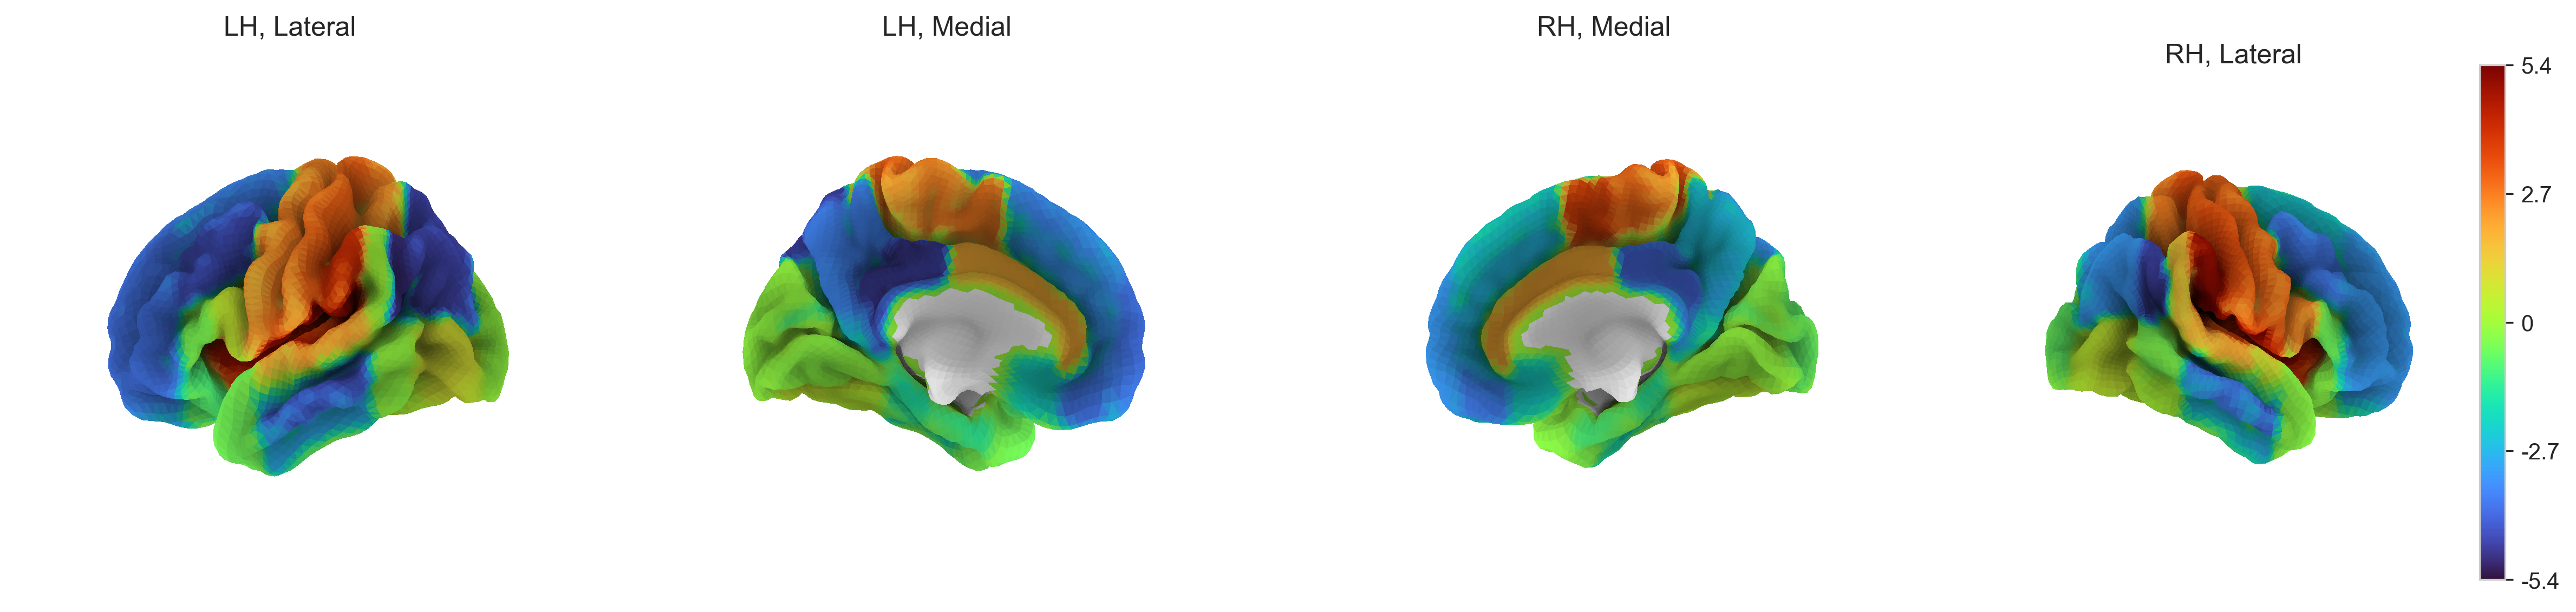

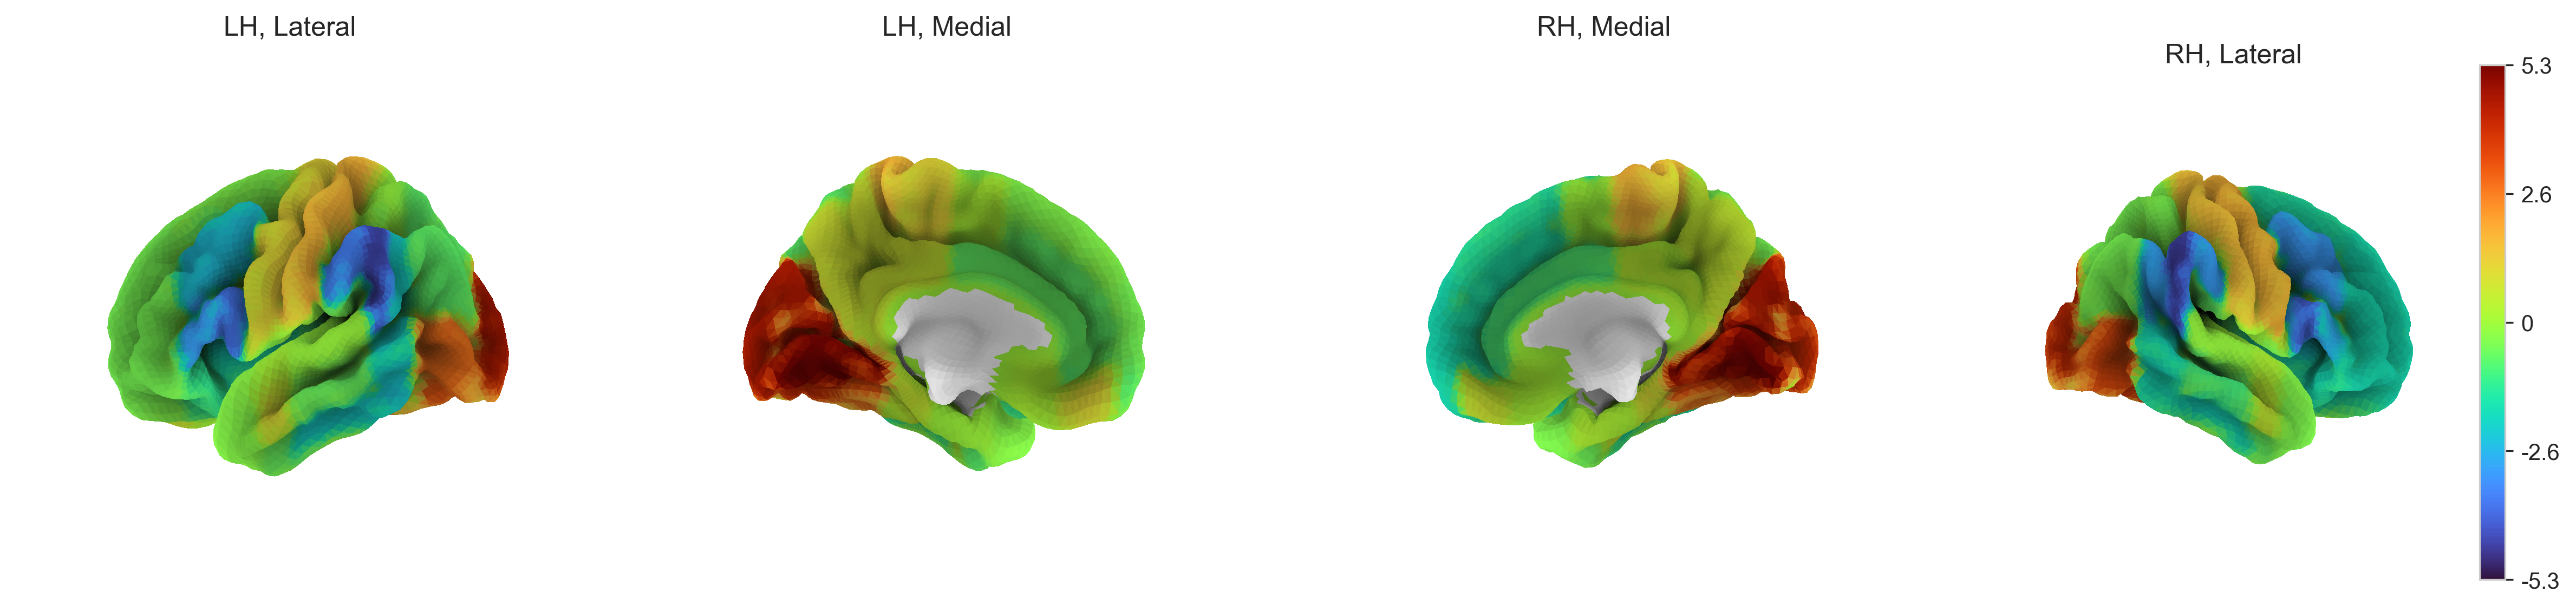

In [37]:
# Drug-naïve MDDs, 1st Gradient
plot_stat_surf(av_gradient_1_DN_MDD_vis, 'pial', 'turbo',colorbar_4= True, darkness = 1)

# Drug-naïve MDDs, 2nd Gradient
plot_stat_surf(av_gradient_2_DN_MDD_vis, 'pial', 'turbo', colorbar_4= True, darkness = 1)


NC: first & second gradients plotted onto fsaverage surface

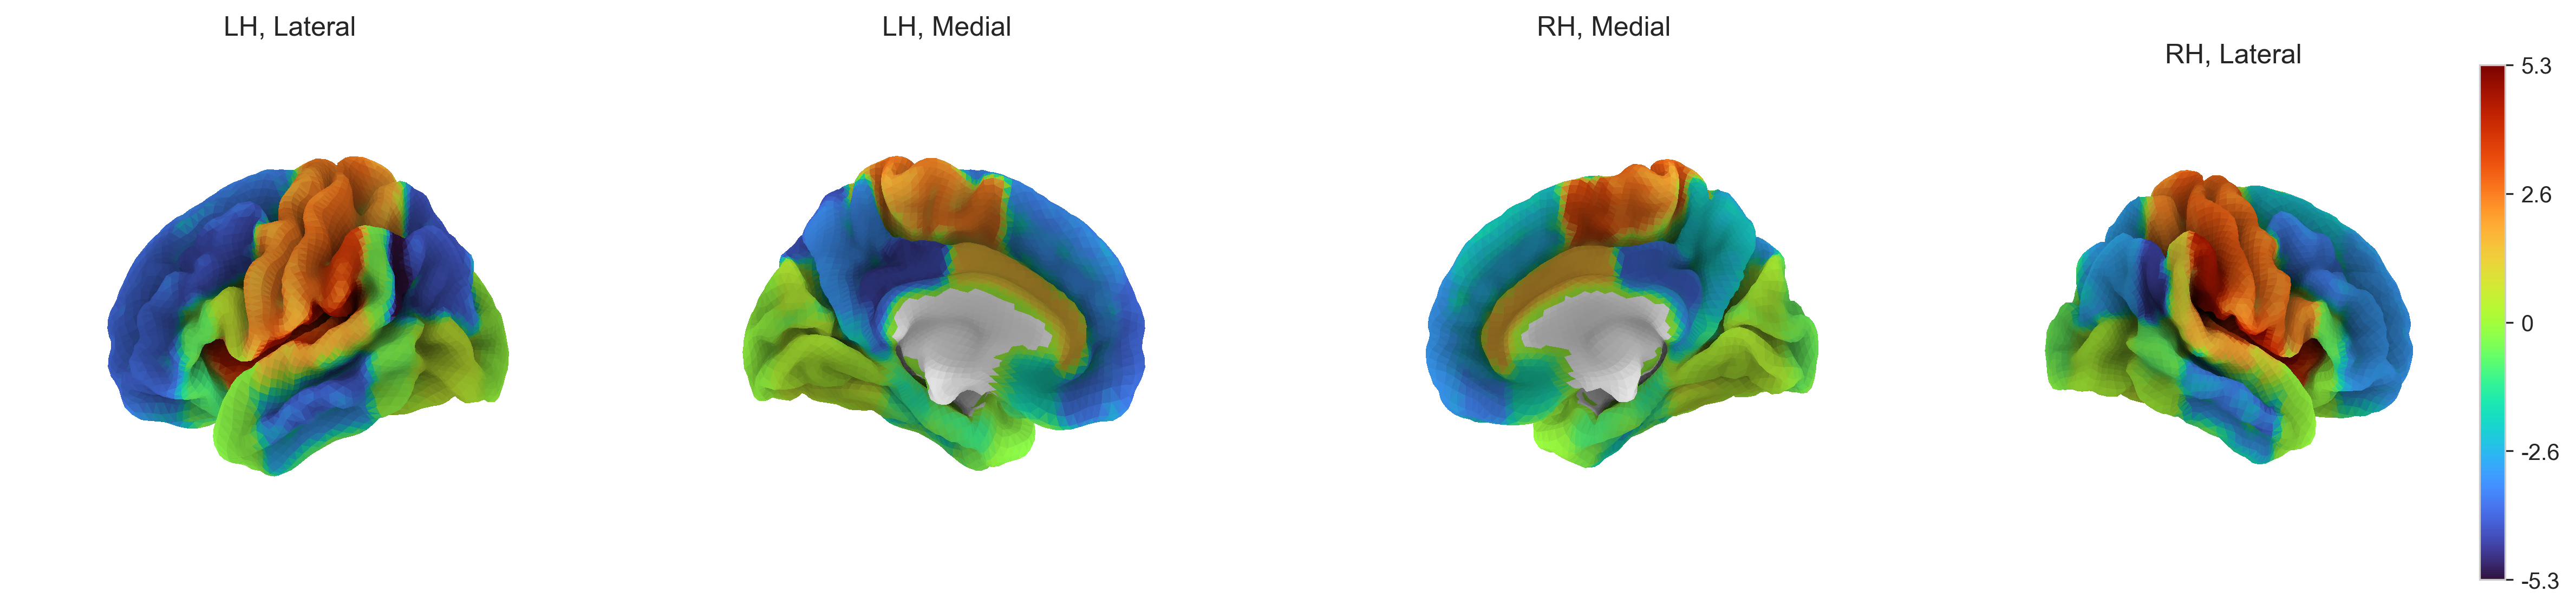

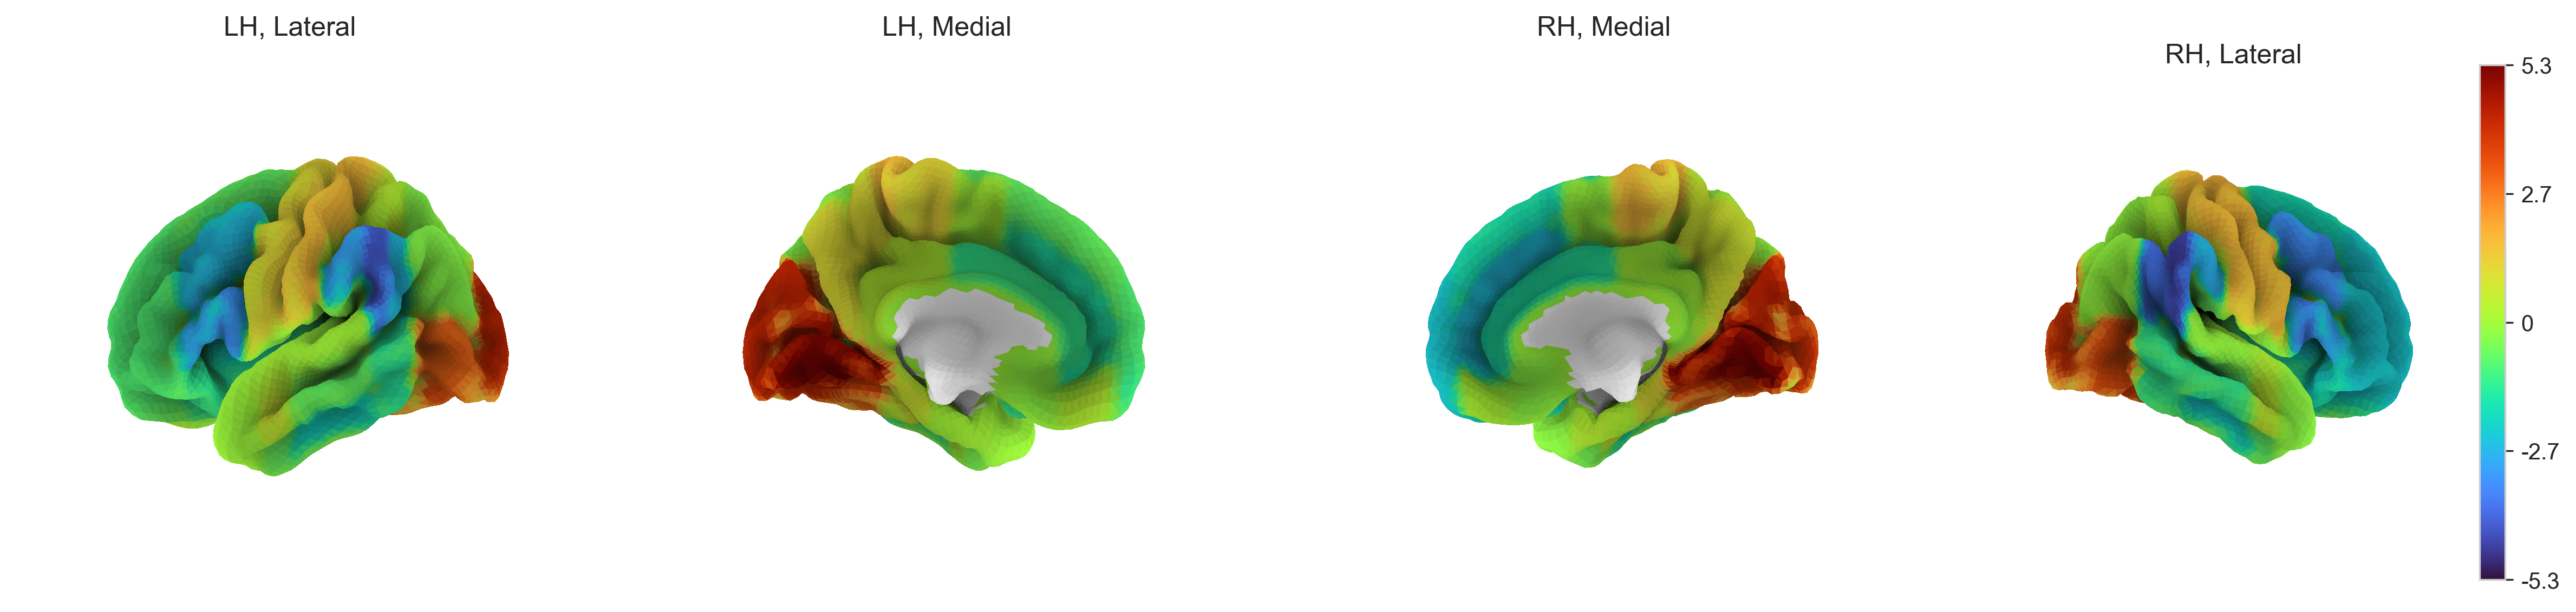

In [40]:
# Controls, 1st Gradient
plot_stat_surf(av_gradient_1_NC_vis, 'pial', 'turbo', colorbar_4= True, darkness = 1)
# Controls, 2nd Gradient
plot_stat_surf(av_gradient_2_NC_vis, 'pial', 'turbo', colorbar_4= True, darkness = 1)


MED: first & second gradients plotted onto fsaverage surface

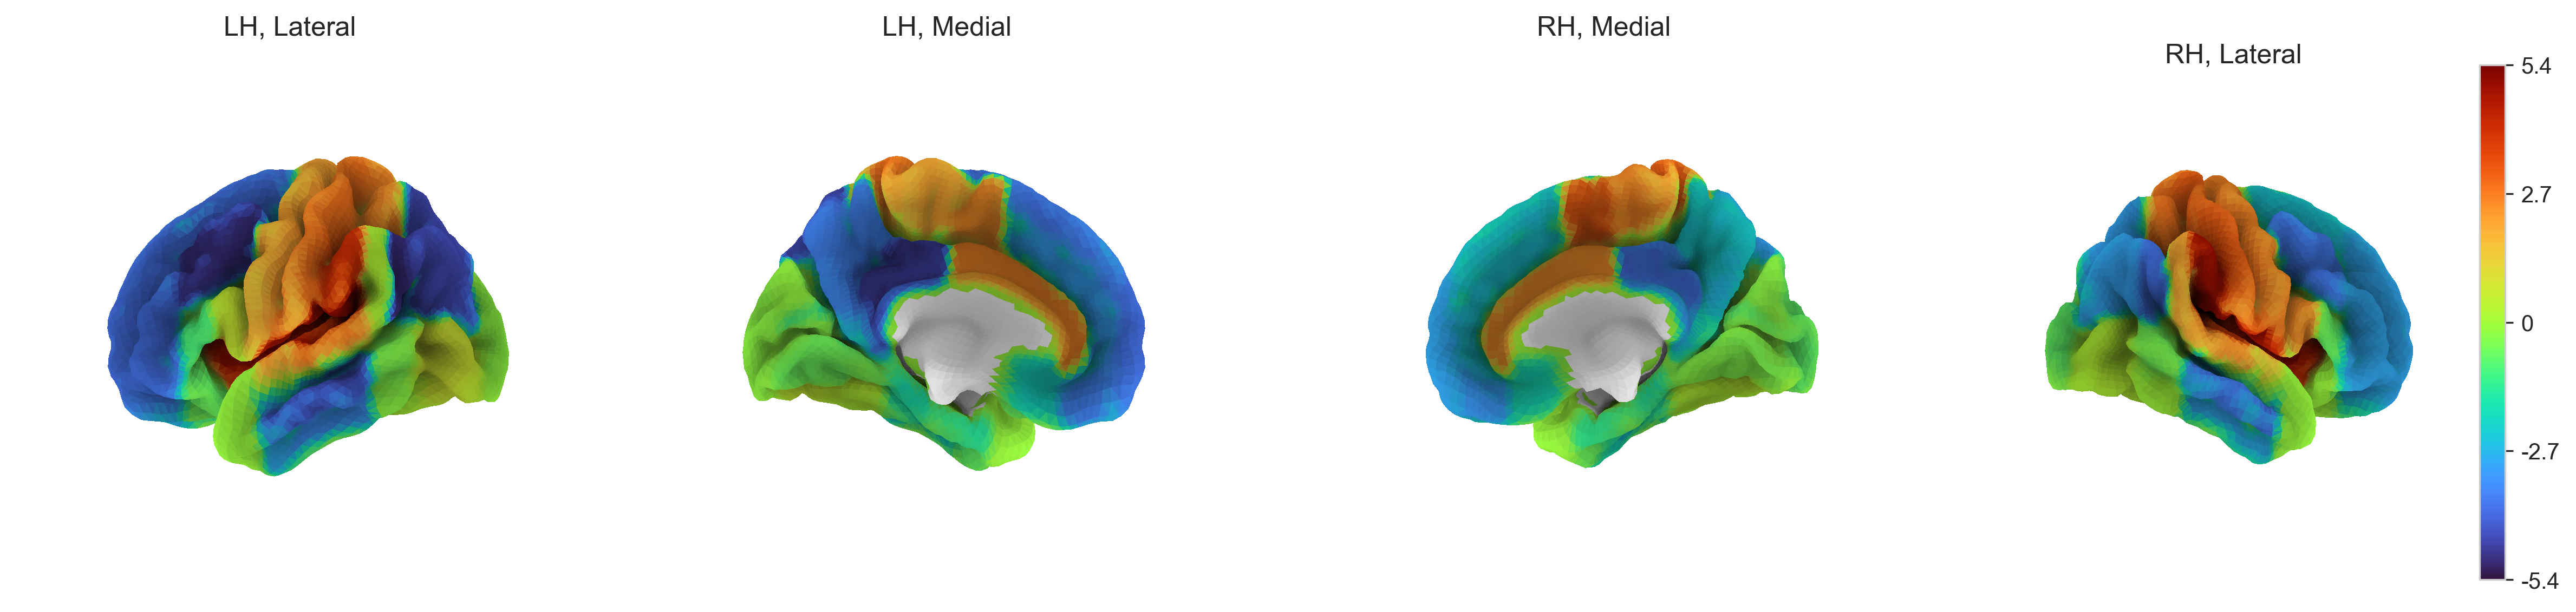

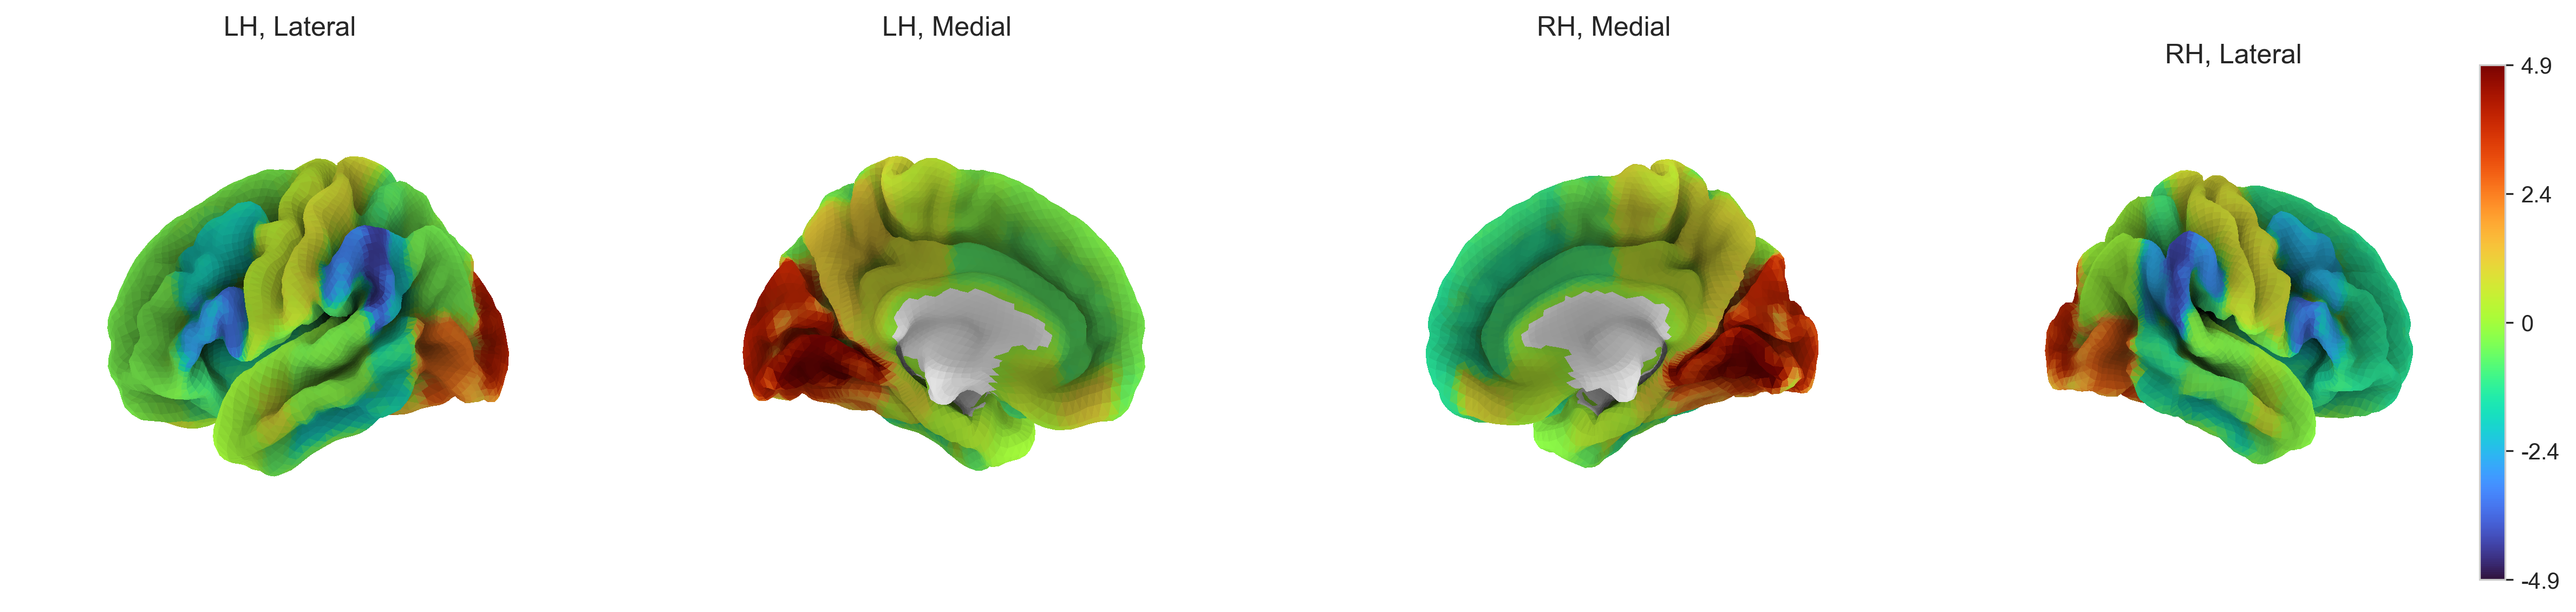

In [41]:
# MDDs on Medication, 1st Gradient
plot_stat_surf(av_gradient_1_MED_MDD_vis, 'pial', 'turbo', colorbar_4= True, darkness = 1)
# MDDs on Medication, 2nd Gradient
plot_stat_surf(av_gradient_2_MED_MDD_vis, 'pial', 'turbo', colorbar_4= True, darkness = 1)

Figures above illustrate gradients resulting from GCCA averaged across subjects. The gradients are different from those described in {cite:t}`margulies_situating_2016` in that the regions constituting the visual network were attributed transitional scores (around 0) between uni- and transmodal regions along the first gradient. The very same regions scored the highest on the second gradient: the visual network was placed at the positive end of the spectrum whereas the associative areas such as angular and frontal middle gyri were attributed the lowest scores. 

### Inferential Statistics: Permutation of the OLS Model

In order to assess the significance of the relationship between the affiliation to a group (DN, MED or NC) and the gradient score of each region, we performed a massively univariate group analysis with permuted ordinary least squares (OLS) linear model. Initially proposed by {cite:t}`fisher_design_1935`, the permutation inference has proven to be flexible in terms of statistical assumptions such as the normality of data distribution and also rigorous in controlling for false positives. {cite:p}`winkler_permutation_2014` The permutation strategy used here is the one established by {cite:t}`freedman_nonstochastic_1983` (for a detailed description see {cite:t}`winkler_permutation_2014`): the model regressors are estimated for the normal (𝛽0) and permuted (𝛽\*) models which are used to compute and compare independent t-values, t0 and t\* respectively. The resulting p-value depends on **i.** the number of permutations and **ii.** the number of times t0 appears to be equal to or greater than t\* at each permutation:

<img class="marginauto" src="figures/formula_1.png" width="150" alt="centered image" />

where n_perm is the number of permutations: in our case, 10000. The following model was fitted onto the first and second gradient scores of all 96 regions as delineated in the Harvard-Oxford atlas:

<img class="marginauto" src="figures/formula_2.png" width="450" alt="centered image" />

where the variables within the square brackets are the nuisance variables which were corrected for.

1. Preparing data frames:

In [42]:
# Numpy arrays containing dependent variables (Gradient Scores)
projs_DN_NC_1 = np.concatenate((projs_DN_MDD[:, :, 0], projs_NC[:, :, 0]))
projs_DN_NC_2 = np.concatenate((projs_DN_MDD[:, :, 1], projs_NC[:, :, 1]))

projs_MED_NC_1 = np.concatenate((projs_MED_MDD[:, :, 0], projs_NC[:, :, 0]))
projs_MED_NC_2 = np.concatenate((projs_MED_MDD[:, :, 1], projs_NC[:, :, 1]))

In [43]:
# Numpy arrays containing explanatory variables (Group)
group_DN_NC = df_desc_stat['Group'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')]
group_DN_NC.loc[group_DN_NC == 'Drug-Naïve MDDs'] = 1
group_DN_NC.loc[group_DN_NC == 'Controls'] = 0
group_DN_NC = group_DN_NC.to_numpy()

group_MED_NC = df_desc_stat['Group'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')]
group_MED_NC.loc[group_MED_NC == 'MDDs on Medication'] = 1
group_MED_NC.loc[group_MED_NC == 'Controls'] = 0
group_MED_NC = group_MED_NC.to_numpy()


In [44]:
# Dummy variables for sex: 0 = male, 1 = female
df_desc_stat['Sex'].loc[df_desc_stat['Sex'] == 1] = 0
df_desc_stat['Sex'].loc[df_desc_stat['Sex'] == 2] = 1

# Numpy arrays containing confounding (nuisance) variables (Sex, Age, Education & Site)
sex_DN_NC = df_desc_stat['Sex'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')].to_numpy()
age_DN_NC = df_desc_stat['Age'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')].to_numpy()
education_DN_NC = df_desc_stat['Education (years)'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')].to_numpy()
site_DN_NC = df_desc_stat['Site'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')].to_numpy()

sex_MED_NC = df_desc_stat['Sex'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')][:382*2].to_numpy()
age_MED_NC = df_desc_stat['Age'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')][:382*2].to_numpy()
education_MED_NC = df_desc_stat['Education (years)'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')][:382*2].to_numpy()
site_MED_NC = df_desc_stat['Site'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')][:382*2].to_numpy()

group_DN_NC = group_DN_NC.astype(bool)
site_DN_NC = site_DN_NC.astype(int)

group_MED_NC = group_MED_NC.astype(bool)
site_MED_NC = site_MED_NC.astype(int)

/Users/VictoriaShevchenko/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/VictoriaShevchenko/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


2. Preparing confounding variables:

In [47]:
# 3-D array containing confounding vars
conf_vars_DN_NC = np.concatenate((sex_DN_NC.reshape(892, 1), 
                                  age_DN_NC.reshape(892, 1), 
                                  education_DN_NC.reshape(892, 1),
                                  site_DN_NC.reshape(892, 1)), 
                                   axis = 1)


In [48]:
conf_vars_MED_NC = np.concatenate((sex_MED_NC.reshape(382*2, 1), 
                                   age_MED_NC.reshape(382*2, 1), 
                                   education_MED_NC.reshape(382*2, 1),
                                   site_MED_NC.reshape(382*2, 1)), 
                                   axis = 1)

3. Running the analysis:

In [49]:
from nilearn.mass_univariate import permuted_ols

permuted_DN_NC_1 = permuted_ols(group_DN_NC,
                                projs_DN_NC_1,
                                conf_vars_DN_NC,
                                model_intercept = True)


In [50]:
permuted_DN_NC_2 = permuted_ols(group_DN_NC,
                                projs_DN_NC_2,
                                conf_vars_DN_NC,
                                model_intercept = True)

In [51]:
permuted_MED_NC_1 = permuted_ols(group_MED_NC[:382*2],
                                projs_MED_NC_1[:382*2],
                                conf_vars_MED_NC,
                                model_intercept = True)

In [52]:
permuted_MED_NC_2 = permuted_ols(group_MED_NC[:382*2],
                                projs_MED_NC_2[:382*2],
                                conf_vars_MED_NC,
                                model_intercept = True)

4. P-values are -log -transfromed. Undo the transformation:

In [53]:
# permuted_ols returns -log10 p-values. Undoing the -log10 transform
for i in range(0,96):
    permuted_DN_NC_1[0][0][i] = 10 ** (-permuted_DN_NC_1[0][0][i])


In [54]:
for i in range(0,96):
    permuted_DN_NC_2[0][0][i] = 10 ** (-permuted_DN_NC_2[0][0][i])


In [55]:
for i in range(0,96):
    permuted_MED_NC_1[0][0][i] = 10 ** (-permuted_MED_NC_1[0][0][i])
    

In [56]:
for i in range(0,96):
    permuted_MED_NC_2[0][0][i] = 10 ** (-permuted_MED_NC_2[0][0][i])
    

5. Convert T-statistics to Cohen's d

The results are reported only for the regions which survived the family-wise error rate (FWE) correction for multiple comparisons. We applied the following formula to compute effect size:

<img class="marginauto" src="figures/formula_3.png" width="200" alt="centered image" />

In [ ]:
#Function: t-statistic to Cohen's d
def t_to_cohens_d(t, n1, n2):
    from math import sqrt
    if n1 == n2:
        d = 2 * t / sqrt(n1 + n2 - 2)
    else:
        d = t * sqrt(1/n1 + 1/n2)
    return d

In [51]:
ols_perm_d_DN_NC_1 = np.empty(96)

for i in range(0,96):
    if permuted_DN_NC_1[0][0][i] <= 0.05:
        ols_perm_d_DN_NC_1[i] = t_to_cohens_d(permuted_DN_NC_1[1][0][i], 446, 446)
    elif permuted_DN_NC_1[0][0][i] > 0.05:
        ols_perm_d_DN_NC_1[i] = None
    

In [52]:
ols_perm_d_DN_NC_2 = np.empty(96)

for i in range(0,96):
    if permuted_DN_NC_2[0][0][i] <= 0.05:
        ols_perm_d_DN_NC_2[i] = t_to_cohens_d(permuted_DN_NC_2[1][0][i], 446, 446)
    elif permuted_DN_NC_2[0][0][i] > 0.05:
        ols_perm_d_DN_NC_2[i] = None
        

In [53]:
ols_perm_d_MED_NC_1 = np.empty(96)

for i in range(0,96):
    if permuted_MED_NC_1[0][0][i] <= 0.05:
        ols_perm_d_MED_NC_1[i] = t_to_cohens_d(permuted_MED_NC_1[1][0][i], 446, 446)
    elif permuted_MED_NC_1[0][0][i] > 0.05:
        ols_perm_d_MED_NC_1[i] = None

In [54]:
ols_perm_d_MED_NC_2 = np.empty(96)

for i in range(0,96):
    if permuted_MED_NC_2[0][0][i] <= 0.05:
        ols_perm_d_MED_NC_2[i] = t_to_cohens_d(permuted_MED_NC_2[1][0][i], 446, 446)
    elif permuted_MED_NC_2[0][0][i] > 0.05:
        ols_perm_d_MED_NC_2[i] = None

In [ ]:
#Check all Cohen's d values and HO labels
def print_cohen_d(cohen_d_array):
    len_array = np.where(np.isnan(cohen_d_array) == False)[0]
    for i in range(0, len(len_array)):
        label = labels[np.where(np.isnan(cohen_d_array) == False)[0][i]]
        cohen_d = cohen_d_array[np.where(np.isnan(cohen_d_array) == False)[0][i]]
        print(label, ", Cohen's d = ", cohen_d)
        